In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [67]:
# Create a list of file paths
file_paths = ['Industry_Portfolios_raw.csv',\
              'Risk_Factors_raw.csv',\
              'Market_Portfolio_raw.csv']

In [68]:
# Create a dictionary to store DataFrames
dataframes = {}

In [69]:
# Loop through the file paths and read CSV files
for file_path in file_paths:
    # Extract the file name without the extension as the DataFrame key
    file_name = file_path.split('_raw')[0]
    df = pd.read_csv(file_path)
    dataframes[file_name] = df

In [70]:
data_frame_industry = dataframes['Industry_Portfolios']

In [71]:
data_frame_market = dataframes['Market_Portfolio']

In [72]:
data_frame_deviation = data_frame_industry - data_frame_market 

In [73]:
data_frame_industry

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
1,200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
2,200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
3,200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
4,200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...,...
115,201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
116,201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
117,201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87
118,201311,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,4.74


In [74]:
industry_mean = data_frame_industry.drop('Date', axis=1).mean()
industry_mean

NoDur    0.902833
Durbl    0.733333
Manuf    1.012833
Enrgy    1.231167
HiTec    0.766250
Telcm    0.881417
Shops    0.916333
Hlth     0.783833
Utils    0.907167
Other    0.489083
dtype: float64

In [75]:
industry_covariance = data_frame_industry.drop('Date', axis=1).cov()
industry_covariance

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,11.193422,18.449666,14.104907,10.531341,12.922949,11.968078,10.170832,9.953112,7.866653,14.438409
Durbl,18.449666,69.920577,39.178097,27.019794,35.466652,27.490543,27.444731,16.824003,12.746136,39.361987
Manuf,14.104907,39.178097,28.198970,23.145380,24.618739,19.550150,17.622867,13.596447,11.440612,26.313423
Enrgy,10.531341,27.019794,23.145380,36.984933,19.267276,15.366817,11.297800,9.630327,14.027168,18.320469
HiTec,12.922949,35.466652,24.618739,19.267276,28.957220,18.708273,17.837115,13.254064,10.304187,23.855470
Telcm,11.968078,27.490543,19.550150,15.366817,18.708273,19.787227,14.169356,11.506599,10.991596,19.610836
Shops,10.170832,27.444731,17.622867,11.297800,17.837115,14.169356,16.759084,10.178849,6.694350,19.226524
Hlth,9.953112,16.824003,13.596447,9.630327,13.254064,11.506599,10.178849,14.342669,7.475036,14.864553
Utils,7.866653,12.746136,11.440612,14.027168,10.304187,10.991596,6.694350,7.475036,13.703052,9.992960
Other,14.438409,39.361987,26.313423,18.320469,23.855470,19.610836,19.226524,14.864553,9.992960,31.163771


In [76]:
market_mean_return_df = data_frame_market.drop('Date', axis=1)
market_mean_return_df

,Market
0,2.22
1,1.46
2,-1.23
3,-1.75
4,1.23
...,...
115,-2.69
116,3.76
117,4.17
118,3.12


In [77]:
def calculate_deviation(data_frame, data_frame_target, df_target_column_name):
    # Exclude the 'Date' column
    columns_to_subtract = data_frame.columns[1:]
    
    # Subtract the 'Rf' column from the selected columns
    deviation = data_frame[columns_to_subtract].sub(data_frame_target[df_target_column_name], axis=0)
    
    # Add the 'Date' column back to the result as the first column
    deviation.insert(0, 'Date', data_frame['Date'])
    
    return deviation

# Assuming you have loaded data_frame_riskfactor, data_frame_industry, and data_frame_market

# Calculate excess return for industry
industry_expected_deviation = calculate_deviation(data_frame_industry, data_frame_market, 'Market')


In [78]:
industry_expected_deviation

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,200401,-2.16,-3.29,-2.84,-1.78,2.31,-0.81,-1.77,0.87,-0.30,0.66
1,200402,2.79,-1.53,0.49,3.23,-4.38,-1.98,4.63,-0.57,0.61,0.70
2,200403,1.14,0.08,0.96,1.10,-1.32,-0.84,1.52,-2.73,2.36,0.60
3,200404,3.17,4.05,1.58,4.27,-3.16,1.27,-0.95,5.29,-1.80,-2.01
4,200405,-3.12,-2.87,0.38,-0.84,3.62,-4.18,-0.93,-1.65,0.05,0.63
...,...,...,...,...,...,...,...,...,...,...,...
115,201308,-1.31,1.69,0.74,0.86,2.57,-0.59,-1.52,-0.80,-1.74,-0.97
116,201309,-1.82,2.70,1.44,-1.73,0.01,0.57,0.70,0.43,-2.71,0.07
117,201310,0.58,-3.45,0.39,0.69,-0.37,1.35,0.91,-0.70,-0.82,-0.30
118,201311,-1.83,-1.31,-0.17,-2.27,0.53,-2.85,0.55,1.42,-4.93,1.62


In [79]:
selected_columns = industry_expected_deviation.drop('Date', axis=1)
selected_columns

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,-2.16,-3.29,-2.84,-1.78,2.31,-0.81,-1.77,0.87,-0.30,0.66
1,2.79,-1.53,0.49,3.23,-4.38,-1.98,4.63,-0.57,0.61,0.70
2,1.14,0.08,0.96,1.10,-1.32,-0.84,1.52,-2.73,2.36,0.60
3,3.17,4.05,1.58,4.27,-3.16,1.27,-0.95,5.29,-1.80,-2.01
4,-3.12,-2.87,0.38,-0.84,3.62,-4.18,-0.93,-1.65,0.05,0.63
...,...,...,...,...,...,...,...,...,...,...
115,-1.31,1.69,0.74,0.86,2.57,-0.59,-1.52,-0.80,-1.74,-0.97
116,-1.82,2.70,1.44,-1.73,0.01,0.57,0.70,0.43,-2.71,0.07
117,0.58,-3.45,0.39,0.69,-0.37,1.35,0.91,-0.70,-0.82,-0.30
118,-1.83,-1.31,-0.17,-2.27,0.53,-2.85,0.55,1.42,-4.93,1.62


In [80]:
ten_industry_portfolios = selected_columns.columns.to_numpy()
ten_industry_portfolios

array(['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops',
       'Hlth', 'Utils', 'Other'], dtype=object)

In [81]:
return_averages = selected_columns.mean()
return_averages

NoDur    0.154750
Durbl   -0.014750
Manuf    0.264750
Enrgy    0.483083
HiTec    0.018167
Telcm    0.133333
Shops    0.168250
Hlth     0.035750
Utils    0.159083
Other   -0.259000
dtype: float64

In [82]:
std_dev_industry = selected_columns.std()

In [83]:
std_dev_industry_array = std_dev_industry.values

In [84]:
R_transposed = return_averages.values

In [85]:
R_transposed

array([ 0.15475   , -0.01475   ,  0.26475   ,  0.48308333,  0.01816667,
        0.13333333,  0.16825   ,  0.03575   ,  0.15908333, -0.259     ])

In [86]:
R = R_transposed.reshape(-1,1)

In [87]:
R

array([[ 0.15475   ],
       [-0.01475   ],
       [ 0.26475   ],
       [ 0.48308333],
       [ 0.01816667],
       [ 0.13333333],
       [ 0.16825   ],
       [ 0.03575   ],
       [ 0.15908333],
       [-0.259     ]])

In [88]:
covariance_matrix_df = selected_columns.cov()
covariance_matrix_df

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,5.439696,-6.073035,-1.396192,-1.200533,-1.883151,1.538885,1.140741,3.815137,4.272002,-1.768738
Durbl,-6.073035,26.628901,4.908024,-3.481055,1.891577,-1.707625,-0.354335,-8.082946,-9.617490,4.385865
Manuf,-1.396192,4.908024,2.950499,1.666133,0.065267,-0.626416,-1.154597,-2.288900,-1.901412,0.358904
Enrgy,-1.200533,-3.481055,1.666133,19.274911,-1.516972,-1.040525,-3.710439,-2.485796,4.454368,-3.864826
HiTec,-1.883151,1.891577,0.065267,-1.516972,5.098746,-0.773294,-0.245350,-1.936284,-2.342839,-1.404050
Telcm,1.538885,-1.707625,-0.626416,-1.040525,-0.773294,4.682567,0.463797,0.693157,2.721477,-1.271778
Shops,1.140741,-0.354335,-1.154597,-3.710439,-0.245350,0.463797,4.452628,0.764510,-0.176666,-0.256987
Hlth,3.815137,-8.082946,-2.288900,-2.485796,-1.936284,0.693157,0.764510,7.820446,3.496136,-1.726842
Utils,4.272002,-9.617490,-1.901412,4.454368,-2.342839,2.721477,-0.176666,3.496136,12.267476,-4.055112
Other,-1.768738,4.385865,0.358904,-3.864826,-1.404050,-1.271778,-0.256987,-1.726842,-4.055112,4.503204


In [89]:
covariance_matrix = covariance_matrix_df.values
covariance_matrix.flatten()

array([ 5.43969574, -6.07303523, -1.39619166, -1.20053326, -1.88315088,
        1.53888487,  1.14074116,  3.81513716,  4.27200187, -1.7687384 ,
       -6.07303523, 26.62890078,  4.90802359, -3.48105498,  1.89157693,
       -1.70762521, -0.35433527, -8.08294641, -9.61749011,  4.38586529,
       -1.39619166,  4.90802359,  2.9504991 ,  1.66613313,  0.06526676,
       -0.62641597, -1.15459666, -2.28889981, -1.90141158,  0.35890361,
       -1.20053326, -3.48105498,  1.66613313, 19.27491058, -1.51697245,
       -1.04052465, -3.7104391 , -2.48579603,  4.4543684 , -3.8648258 ,
       -1.88315088,  1.89157693,  0.06526676, -1.51697245,  5.09874619,
       -0.77329384, -0.24535029, -1.93628433, -2.34283867, -1.40405025,
        1.53888487, -1.70762521, -0.62641597, -1.04052465, -0.77329384,
        4.68256695,  0.46379748,  0.69315714,  2.72147703, -1.27177815,
        1.14074116, -0.35433527, -1.15459666, -3.7104391 , -0.24535029,
        0.46379748,  4.452628  ,  0.76451015, -0.17666632, -0.25

In [90]:
inverse_covariance_matrix = np.linalg.inv(covariance_matrix)

In [91]:
inverse_covariance_matrix

array([[ 5.45383229e-01,  4.52282303e-02,  2.07945041e-01,
         2.78363758e-01,  6.04680938e-01,  1.53595518e-01,
         1.80487809e-01,  1.90500937e-01,  5.74650893e-02,
         7.59500969e-01],
       [ 4.52282303e-02,  8.96520899e-02, -8.74489380e-02,
         3.89464036e-02,  4.29778706e-02,  6.25343163e-03,
        -7.13876686e-04,  6.30519257e-02,  2.71023736e-02,
         3.45527748e-02],
       [ 2.07945041e-01, -8.74489380e-02,  1.13979978e+00,
         4.02051132e-01,  1.05645736e+00,  3.70594533e-01,
         5.77248304e-01,  6.14377150e-01,  3.04562775e-01,
         1.39790823e+00],
       [ 2.78363758e-01,  3.89464036e-02,  4.02051132e-01,
         5.06498392e-01,  9.53963540e-01,  3.57385466e-01,
         4.62025059e-01,  5.39514740e-01,  1.89783184e-01,
         1.27657562e+00],
       [ 6.04680938e-01,  4.29778706e-02,  1.05645736e+00,
         9.53963540e-01,  2.30237254e+00,  7.43644981e-01,
         9.52973363e-01,  1.15990395e+00,  5.37592942e-01,
         2.

In [92]:
e = np.ones((10,1))

In [93]:
e_transposed = e.transpose()

In [94]:
e_transposed

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [95]:
alpha = np.dot(np.dot(R_transposed, inverse_covariance_matrix),e)

In [96]:
alpha

array([2.93212788])

In [97]:
zeta = np.dot(np.dot(R_transposed, inverse_covariance_matrix),R)

In [98]:
zeta

array([0.20474497])

In [99]:
delta = np.dot(np.dot(e_transposed, inverse_covariance_matrix),e)

In [100]:
delta

array([[58.55025438]])

In [101]:
RMV = alpha/delta

In [102]:
RMV

array([[0.05007882]])

In [103]:
# Create a range of values for Rp from 0 to 0.1 with an interval of 0.1
Rp_range = np.arange(0, 0.105, 0.005).reshape(1, -1).flatten()

In [104]:
Rp_range

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  ])

In [105]:
# Calculate the standard deviation for each value of Rp using the formula
variance = (1 / delta + (delta / (zeta * delta - alpha**2)) * (Rp_range - RMV)**2).flatten()

In [106]:
variance

array([0.06038791, 0.05217155, 0.04481864, 0.03832918, 0.03270316,
       0.0279406 , 0.02404147, 0.0210058 , 0.01883357, 0.01752479,
       0.01707945, 0.01749756, 0.01877912, 0.02092413, 0.02393258,
       0.02780448, 0.03253982, 0.03813861, 0.04460085, 0.05192653,
       0.06011566])

In [107]:
std_dev = np.sqrt(variance)

In [108]:
std_dev

array([0.24573951, 0.22841092, 0.21170414, 0.19577839, 0.18084016,
       0.16715441, 0.15505313, 0.14493377, 0.13723545, 0.13238122,
       0.13068838, 0.13227836, 0.13703694, 0.14465174, 0.15470158,
       0.16674674, 0.18038797, 0.19529109, 0.21118913, 0.22787394,
       0.24518496])

### Create a table showing the mean return and standard deviation of return for the ten industry portfolios.

In [109]:
data = pd.DataFrame({
    'Industry_Portfolios': ten_industry_portfolios,
    'Mean Return': R_transposed,
    'Standard Deviation': std_dev_industry_array
}, index=range(1, 11))

# Use the `style` attribute to align text at the center
styled_data = data.style.set_properties(**{'text-align': 'center'})

styled_data

,Industry_Portfolios,Mean Return,Standard Deviation
1,NoDur,0.154750,2.332316
2,Durbl,-0.014750,5.160320
3,Manuf,0.264750,1.717702
4,Enrgy,0.483083,4.390320
5,HiTec,0.018167,2.258040
6,Telcm,0.133333,2.163924
7,Shops,0.168250,2.110125
8,Hlth,0.035750,2.796506
9,Utils,0.159083,3.502496
10,Other,-0.259000,2.122075


In [110]:
cov_matrix_df = pd.DataFrame(covariance_matrix)

cov_matrix_df

,0,1,2,3,4,5,6,7,8,9
0,5.439696,-6.073035,-1.396192,-1.200533,-1.883151,1.538885,1.140741,3.815137,4.272002,-1.768738
1,-6.073035,26.628901,4.908024,-3.481055,1.891577,-1.707625,-0.354335,-8.082946,-9.617490,4.385865
2,-1.396192,4.908024,2.950499,1.666133,0.065267,-0.626416,-1.154597,-2.288900,-1.901412,0.358904
3,-1.200533,-3.481055,1.666133,19.274911,-1.516972,-1.040525,-3.710439,-2.485796,4.454368,-3.864826
4,-1.883151,1.891577,0.065267,-1.516972,5.098746,-0.773294,-0.245350,-1.936284,-2.342839,-1.404050
5,1.538885,-1.707625,-0.626416,-1.040525,-0.773294,4.682567,0.463797,0.693157,2.721477,-1.271778
6,1.140741,-0.354335,-1.154597,-3.710439,-0.245350,0.463797,4.452628,0.764510,-0.176666,-0.256987
7,3.815137,-8.082946,-2.288900,-2.485796,-1.936284,0.693157,0.764510,7.820446,3.496136,-1.726842
8,4.272002,-9.617490,-1.901412,4.454368,-2.342839,2.721477,-0.176666,3.496136,12.267476,-4.055112
9,-1.768738,4.385865,0.358904,-3.864826,-1.404050,-1.271778,-0.256987,-1.726842,-4.055112,4.503204


In [111]:
Rp_range

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  ])

### The two frontiers will intersect at single point: the tangency portfolio:

### Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios.

In [112]:
# For information ratio, there is no Rf
Rf = 0

last_index_Rp = Rp_range[-1]
last_index_std_dev = std_dev[-1]

CAL_x_axis = np.array([0, last_index_std_dev])
 
information_ratio = ((zeta- 2*alpha*Rf + delta * Rf**2)**(1/2)).item()

information_ratio

0.452487539619932

In [113]:
# Calculate the tangency portfolio standard deviation

std_dev_tg = -(zeta-2*alpha*Rf+delta*Rf**2)**(1/2)/(delta*(Rf-RMV))
Rtg = information_ratio * std_dev_tg + Rf

In [114]:
std_dev_tg

array([[0.15432053]])

In [115]:
Rtg

array([[0.06982812]])

In [116]:
inverse_covariance_matrix

array([[ 5.45383229e-01,  4.52282303e-02,  2.07945041e-01,
         2.78363758e-01,  6.04680938e-01,  1.53595518e-01,
         1.80487809e-01,  1.90500937e-01,  5.74650893e-02,
         7.59500969e-01],
       [ 4.52282303e-02,  8.96520899e-02, -8.74489380e-02,
         3.89464036e-02,  4.29778706e-02,  6.25343163e-03,
        -7.13876686e-04,  6.30519257e-02,  2.71023736e-02,
         3.45527748e-02],
       [ 2.07945041e-01, -8.74489380e-02,  1.13979978e+00,
         4.02051132e-01,  1.05645736e+00,  3.70594533e-01,
         5.77248304e-01,  6.14377150e-01,  3.04562775e-01,
         1.39790823e+00],
       [ 2.78363758e-01,  3.89464036e-02,  4.02051132e-01,
         5.06498392e-01,  9.53963540e-01,  3.57385466e-01,
         4.62025059e-01,  5.39514740e-01,  1.89783184e-01,
         1.27657562e+00],
       [ 6.04680938e-01,  4.29778706e-02,  1.05645736e+00,
         9.53963540e-01,  2.30237254e+00,  7.43644981e-01,
         9.52973363e-01,  1.15990395e+00,  5.37592942e-01,
         2.

In [117]:
# Calculate tangency portfolio weight

lagrange_multiplier = (Rtg)/(zeta).flatten()
lagrange_multiplier

array([[0.34104924]])

In [118]:
portfolio_weight = lagrange_multiplier * np.dot(inverse_covariance_matrix , (R))

portfolio_weight

array([[5.26341943e-02],
       [1.53428449e-04],
       [1.37626709e-01],
       [8.70322403e-02],
       [1.79352886e-01],
       [7.10739711e-02],
       [1.06884468e-01],
       [1.02775950e-01],
       [4.01622131e-02],
       [2.22303939e-01]])

In [119]:
np.sum(portfolio_weight)

1.0000000000000002

In [120]:
data['Porftolio Weight'] = portfolio_weight

data

,Industry_Portfolios,Mean Return,Standard Deviation,Porftolio Weight
1,NoDur,0.154750,2.332316,0.052634
2,Durbl,-0.014750,5.160320,0.000153
3,Manuf,0.264750,1.717702,0.137627
4,Enrgy,0.483083,4.390320,0.087032
5,HiTec,0.018167,2.258040,0.179353
6,Telcm,0.133333,2.163924,0.071074
7,Shops,0.168250,2.110125,0.106884
8,Hlth,0.035750,2.796506,0.102776
9,Utils,0.159083,3.502496,0.040162
10,Other,-0.259000,2.122075,0.222304


In [143]:
selected_columns = data\
[["Industry_Portfolios", "Porftolio Weight"]]

selected_columns

,Industry_Portfolios,Porftolio Weight
1,NoDur,0.052634
2,Durbl,0.000153
3,Manuf,0.137627
4,Enrgy,0.087032
5,HiTec,0.179353
6,Telcm,0.071074
7,Shops,0.106884
8,Hlth,0.102776
9,Utils,0.040162
10,Other,0.222304


### Plot the minimum-variance frontier (without the riskless asset) generated by the ten industry portfolios & efficient frontier (with the riskless asset) on the same graph with risk-free rate 0.13%

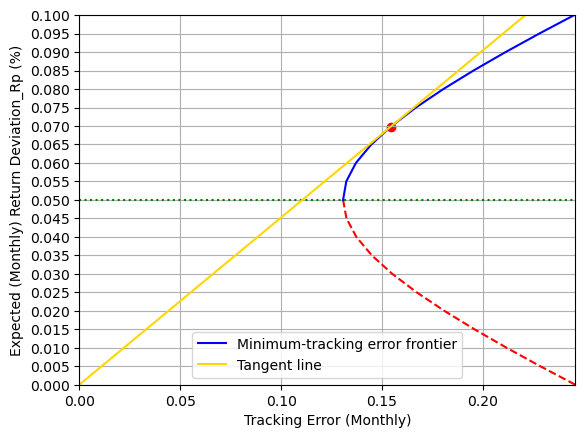

In [122]:
# Flatten Rp_range and std_dev to 1D arrays
# Rp_range = Rp_range.flatten()
# std_dev = std_dev.flatten()

# Calculate the median value of Rp
median_Rp = round(RMV.item(),2)

# Split the data into two parts based on the median Rp value
lower_half_indices = Rp_range <= median_Rp
upper_half_indices = Rp_range >= median_Rp

# Create a scatter plot for the lower half (dashed line)
# plt.scatter(std_dev[lower_half_indices], Rp_range[lower_half_indices], marker='o', color='grey', label='Data Points (Dashed)')
plt.plot(std_dev[lower_half_indices],
         Rp_range[lower_half_indices],
         color='red',
         linestyle='--')

# Create a scatter plot for the upper half (solid line)
# plt.scatter(std_dev[upper_half_indices], Rp_range[upper_half_indices], marker='o', color='blue')
plt.plot(std_dev[upper_half_indices],
         Rp_range[upper_half_indices],
         color='blue',
         linestyle='-',
         label='Minimum-tracking error frontier')

# Draw a horizontal line at RMV
plt.axhline(y=RMV, color='green', linestyle='dotted')

# Find the index where the Sharpe ratio is maximized (tangent point)
tangent_idx = np.argmax(information_ratio)
tangent_std_dev = std_dev[tangent_idx]
tangent_return = Rp_range[tangent_idx]

# Plot a linear line between using the Sharpe ratio as the slope
linear_line = information_ratio * CAL_x_axis
plt.plot(CAL_x_axis, linear_line, color='gold', linestyle='-', label='Tangent line')

# Plot the CAL tangent point
plt.scatter(std_dev_tg, Rtg, color='red', marker='o')
plt.annotate(f'Tangent \n{round(std_dev_tg.item(),2),round(Rtg.item(),2)}'
             , (std_dev_tg-0.4, Rtg)
             , ha='center'
             , fontsize=8
             , weight='bold')

# Set labels and title
plt.xlabel('Tracking Error (Monthly)')
plt.ylabel('Expected (Monthly) Return Deviation_Rp (%)')
# plt.title('Efficient Frontier',
#           weight='bold')

# Set the Y-axis ticks with an increment of 0.005
plt.yticks(np.arange(0, max(Rp_range) + 0.005, 0.005))

# Set the X-axis ticks with an increment of 0.1
plt.xticks()


# Set the X-axis limits to start from 0
plt.xlim(0, max(std_dev))  # Adjust the upper limit as needed
plt.ylim(0, max(Rp_range))  # Adjust the upper limit as needed

# Show the plot
plt.legend(loc='lower center')
plt.grid(True)
plt.show()

### Part 2

### Simulating random portfolios data points

In [123]:
data_points = 100000

In [124]:
num_weight = len(portfolio_weight)

## with normalized W

In [125]:
# Generate random numbers
random_data = np.random.rand(data_points,num_weight)

# Normalize each row of date to ensure the sum of each row is equal to one
normalized_portfolio_weight = random_data / random_data.sum(axis=1, keepdims=True)

# Transpose normalised data (portfolio weight)
transpose_portfolio_weight = normalized_portfolio_weight.T

# Processed data point
mean_random_point = normalized_portfolio_weight * industry_mean.values

portfolio_mean = np.mean(mean_random_point, axis=1)



In [126]:
normalized_portfolio_weight

array([[0.1223499 , 0.15692848, 0.03743557, ..., 0.1143215 , 0.10876378,
        0.16009327],
       [0.00302833, 0.07690325, 0.17353591, ..., 0.23262523, 0.13325024,
        0.01250357],
       [0.07963078, 0.15791418, 0.07511208, ..., 0.05881249, 0.12606039,
        0.09184083],
       ...,
       [0.06470538, 0.16964146, 0.07381025, ..., 0.08868904, 0.09558103,
        0.0617042 ],
       [0.13765716, 0.11433629, 0.13003961, ..., 0.16057932, 0.14928366,
        0.05642562],
       [0.1081786 , 0.09380991, 0.13039458, ..., 0.0853483 , 0.13879184,
        0.05099591]])

In [127]:
mean_random_point.shape

(100000, 10)

In [128]:
portfolio_mean.shape

(100000,)

In [129]:
# Initialize an empty list to store the results
results = []

# Iterate over the columns of transpose_portfolio_weight
for i in range(transpose_portfolio_weight.shape[1]):
    # Extract the i-th column as a 1x10 matrix
    transpose_column = transpose_portfolio_weight[:, i].reshape(1, -1)
    
    # Extract the i-th column of normalized_portfolio_weight as a 10x1 matrix
    normalized_column = normalized_portfolio_weight[i,:].reshape(-1, 1)
    
    # Perform your calculations for this pair of matrices
    # For example, calculate variance for this specific pair
    SD_random_point = np.sqrt(\
                        np.dot(\
                          np.dot(\
                             transpose_column, industry_covariance.values),\
                             normalized_column))
    
    # Append the result to the list
    results.append(SD_random_point)
   

# Flatten the list of arrays and remove the array wrapper
flat_SD_results = np.squeeze(results)

In [130]:
flat_SD_results

array([4.40030505, 4.14962547, 4.41169747, ..., 4.47598802, 4.08388257,
       4.08805736])

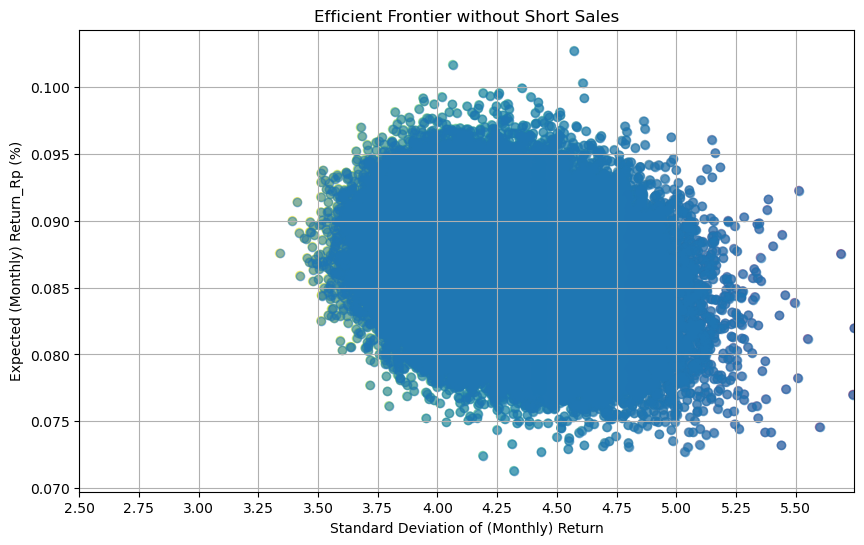

In [131]:
# Plot the scatter plot

colors = flat_SD_results 

plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sc = plt.scatter(flat_SD_results, portfolio_mean, c=colors, cmap='viridis_r', alpha=0.5)



plt.scatter(flat_SD_results,portfolio_mean, alpha=0.5)  # alpha controls transparency of points
plt.xlabel('Standard Deviation of (Monthly) Return')
plt.ylabel('Expected (Monthly) Return_Rp (%)')
plt.title('Efficient Frontier without Short Sales')
plt.grid(True)  # Add grid lines

# Set the X-axis ticks with an increment of 0.25
plt.xticks(np.arange(2.5, max(flat_SD_results) + 0.25, 0.25))

# Set the lower limit of the x-axis to 0
plt.xlim(2.5, max(flat_SD_results))  # Replace 'max(flat_SD_results)' with the desired upper limit if needed


# # Add a colorbar
# cbar = plt.colorbar(sc)

plt.show()

## with 1/W

In [132]:
# Invert normalize each row of date to ensure the sum of each row is equal to one
invert_data = 1/ normalized_portfolio_weight
        
# Normalize each row by dividing by the row sum
row_sums = invert_data.sum(axis=1, keepdims=True)
inverted_normalized_portfolio_weight = invert_data / row_sums


# Transpose normalised data (portfolio weight)
transpose_inverted_portfolio_weight = inverted_normalized_portfolio_weight.T

# Processed data point
inverted_mean_random_point = inverted_normalized_portfolio_weight * industry_mean.values

inverted_portfolio_mean = np.mean(inverted_mean_random_point, axis=1)

# Initialize an empty list to store the results
inverted_results = []

# Iterate over the columns of transpose_portfolio_weight
for i in range(transpose_portfolio_weight.shape[1]):
    # Extract the i-th column as a 1x10 matrix
    inverted_transpose_column = transpose_inverted_portfolio_weight[:, i].reshape(1, -1)
    
    # Extract the i-th column of normalized_portfolio_weight as a 10x1 matrix
    inverted_normalized_column = inverted_normalized_portfolio_weight[i,:].reshape(-1, 1)
    
    # Perform your calculations for this pair of matrices
    # For example, calculate variance for this specific pair
    inverted_SD_random_point = np.sqrt(\
                        np.dot(\
                          np.dot(\
                             inverted_transpose_column, industry_covariance.values),\
                             inverted_normalized_column))
    
    # Append the result to the list
    inverted_results.append(inverted_SD_random_point)
   

# Flatten the list of arrays and remove the array wrapper
inverted_flat_SD_results = np.squeeze(inverted_results)

In [133]:
inverted_flat_SD_results

array([4.70747302, 3.66035761, 4.23029171, ..., 4.2915644 , 4.38848339,
       4.44979336])

In [134]:
inverted_portfolio_mean

array([0.10502384, 0.08395805, 0.09215765, ..., 0.09332672, 0.08379509,
       0.08387255])

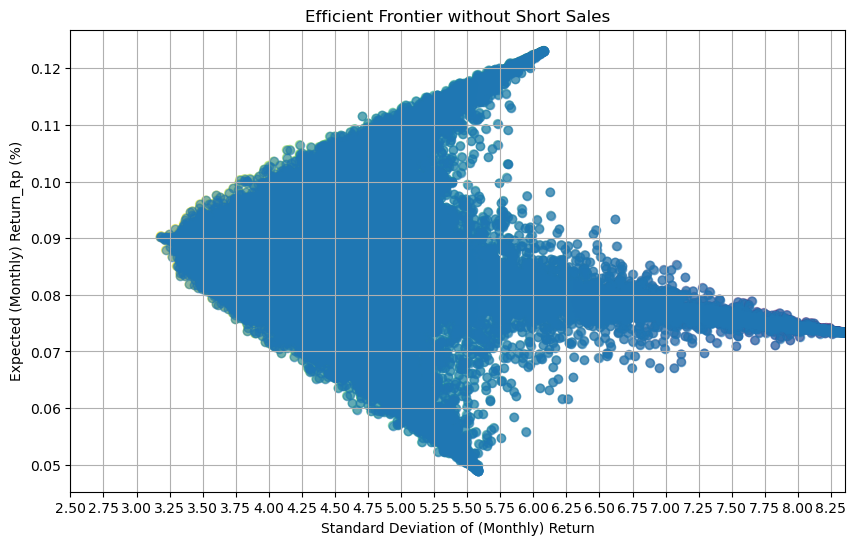

In [135]:
# Plot the scatter plot

colors = inverted_flat_SD_results 

plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sc = plt.scatter(inverted_flat_SD_results, inverted_portfolio_mean, c=colors, cmap='viridis_r', alpha=0.5)



plt.scatter(inverted_flat_SD_results,inverted_portfolio_mean, alpha=0.5)  # alpha controls transparency of points
plt.xlabel('Standard Deviation of (Monthly) Return')
plt.ylabel('Expected (Monthly) Return_Rp (%)')
plt.title('Efficient Frontier without Short Sales')
plt.grid(True)  # Add grid lines

# Set the X-axis ticks with an increment of 0.25
plt.xticks(np.arange(2.5, max(inverted_flat_SD_results) + 0.25, 0.25))

# Set the lower limit of the x-axis to 0
plt.xlim(2.5, max(inverted_flat_SD_results))  # Replace 'max(flat_SD_results)' with the desired upper limit if needed


# # Add a colorbar
# cbar = plt.colorbar(sc)

plt.show()